# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
#check the headers to get an idea about the columns
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

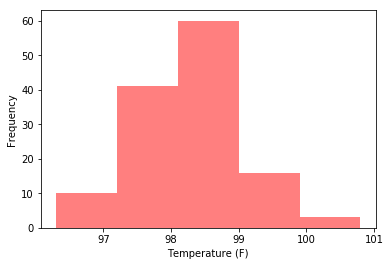

In [16]:
plt.hist(df.temperature, bins = 5, color='red', alpha = 0.5)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

The above figure is a histogram plot for the temperature data with 5 bins. The plot has a single peak and indicates a normal distribution. However, changing the bins can result in more peaks (typical problem). It will be good to test by plotting an other histogram with a higher bin.

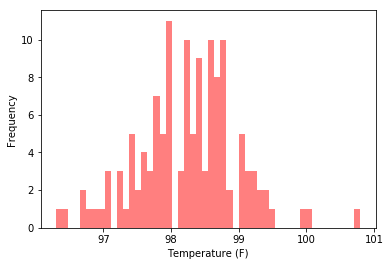

In [17]:
plt.hist(df.temperature, bins = 50, color='red', alpha = 0.5)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

The above plot shows somewhat of a normal distribution. The best check will be to plot the Cumuulative Distribution Function (CDF).

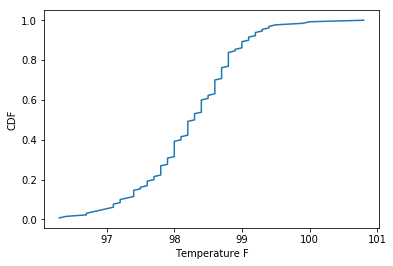

In [22]:
# Define a function to calculate the CDF
def cdf(data):
    '''Compute Cummulative Distribution Function'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    
    return x,y

#Compute the cdf for the temperature data
x_temp, y_temp = cdf(df.temperature)

#plot the Cdf
temperature_CDF_plot = plt.plot(x_temp,y_temp)
plt.xlabel('Temperature F')
plt.ylabel('CDF')
plt.show()

The above CDF plot indicates that the temperature data is in fact normally distributed.

2. Is the sample size large? Are the observations independent?

The sample size condition for CLT is n > 30 (rule of thumb). And for normally distributed data the theorem will hold true for even smaller values. In this case the number of temperature observations os 130 (>30) and hence the sample size is large enough.

The sample size 130 < 10% of the population, the data is independent.

3. Is the true population mean really 98.6 degrees F?

Here the null hypotheis is nu (population mean) = 98.6 degrees F
The alternate hypothesis is nu not equal to 98.6 degrees F

In [61]:
#conduct a one sample t-test for the null hypothesis
stats.ttest_1samp(a=df.temperature, popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The p-value for the t-statistic is well below 0.05. This means that the null hypothesis is rejected and the population mean is different from 98.6 F.

Would you use a one-sample or two-sample test? Why?

A two-sample t-test investigates whether the means of two independent data samples differ from one another which is not the case. Here we are ineterested only in the population mean from the sample mean where a single sample test is sufficient. 

In this situation, is it appropriate to use the  t  or  z  statistic?

The t statistic is used when the population standard deviation is unknown, which is the case here. Hence, the t-statistic is the appropriate one to use. The z-statistic is typically used when the population standard deviation is known and the sample size is above 30.

In [ ]:
#Now try using the other test. How is the result be different? Why?
mean = np.mean(df.temperature)
std = np.std(df.temperature)
z_score = (mean - 98.6)/std
z_score

#calculate the p-value for the Z-score
p_value = stats.norm.cdf(z_score) * 2

The p-value for the z-test is 0.63. The p-value is above 0.05. Hence the null hypothesis is not rejected and the population mean is indeed 98.6 degrees F as per the z-test. This is the opposite of the t-test conclusion. 

In [76]:
#4. Draw a small sample of size 10 from the data and repeat both tests.

#Extract sample size of 10 from the data
np.random.seed(42)
sample_data = np.random.choice(df.temperature,size=10)

#t-test on sample dataset
print ('T-test statistics for the sample with size 10 = ',stats.ttest_1samp(a=sample_data, popmean=98.6))

sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data)
z_score_sample = (sample_mean - 98.6)/sample_std
p_value_sample = stats.norm.cdf(z_score_sample)*2
print ('p-value for z-test on the sample with size 10 = ', p_value)       

T-test statistics for the sample with size 10 =  Ttest_1sampResult(statistic=-3.0934479202257976, pvalue=0.012857704604809363)
p-value for z-test on the sample with size 10 =  0.315517562793


Which one is the correct one to use?

Here again we need to use the t-statistic since we do not know the population standard deviation and the sample size is less than 30. 

What do you notice? What does this tell you about the difference in application of the t and z statistic?

The t-test rejects the null hypothesis and the z-test does not reject the null hypothesis. The difference indicates that the z-test can result in a Type1/Type2 error. 

In [73]:
#5. At what temperature should we consider someone's temperature to be "abnormal"?

standard_error = std/math.sqrt(len(df.temperature))
#calculate 99% confidence interval
temp_low, temp_high = 98.6 - 2.576 * standard_error, 98.6 + 2.576 * standard_error #z-score for 99% CI is 2.576
print ('Temperature is abnormal if it exceeds ',temp_high,' degree F',' or is lower than',temp_low,' degree F.')

Temperature is abnormal if it exceeds  98.76500983945482  degree F  or is lower than 98.43499016054517  degree F.


In [ ]:
#6. Is there a significant difference between males and females in normal temperature?

#subset the data for the male and female temperature observations

male = df[df.gender == 'M']
female = df[df.gender == 'F']

#conduct a two-sample t-test for male and female samples
t_test_stats = stats.ttest_ind(a=male.temperature,b=female.temperature,equal_var=False)
print ('The p value for the two sample t-test is ',t_test_stats[1])
print ('The p value is less than 0.05 which indicates that the null hypothesis is rejected. There is a significant difference between the means of the two samples.')

A two sample t-test has to be used for comparing means between two samples.

Write a story with your conclusion in the context of the original problem.

The mean normal body temperature was held to be 37 C or 98.6 F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. A statistical anaysis was done on the dataset to test the validity of the statisitic. A datest with human body temperatures was analyzed. A one sample t-test was perfomed. The p-value from the t-test was observed to be well below 0.05. Hence the null hypothesis was rejected, which indicates that the mean body temperature is indeed different from 98.6 degree F. Also, a two-sample t-test was done for the male and female temperatures. The results indicate that the mean values for the male and female temperatures are significantly different. 